In [ ]:
# Import required libraries
import pandas as pd
from openpyxl import load_workbook
import glob
import matplotlib.pyplot as plt

#Cities

In [ ]:
# Locate all Excel files
file_paths = glob.glob("/content/eng_data/*.xlsx")

# List to store data from all files
all_dfs = []

# Read and process each Excel file individually
for file in file_paths:
    print(f"Processing file: {file}")

    # Load the workbook with openpyxl to preserve hyperlinks
    wb = load_workbook(file, data_only=True)
    ws = wb.active

    data = []

    # Iterate through each row, skipping the header (min_row=2)
    for row in ws.iter_rows(min_row=2, values_only=False):
        row_data = []

        # Extract main fields
        row_data.append(row[0].value)
        row_data.append(row[1].value)
        row_data.append(row[2].value)

        # Extract SM/REFERENCE LINKS
        cell_ref = row[3]
        if cell_ref.hyperlink:
            row_data.append(cell_ref.hyperlink.target)
        else:
            row_data.append(cell_ref.value)

        # LOCATION (Google Maps)
        cell_loc = row[4]
        if cell_loc.hyperlink:
            row_data.append(cell_loc.hyperlink.target)
        else:
            row_data.append(cell_loc.value)

        # Add processed row to data list
        data.append(row_data)

    # Convert processed data into a DataFrame
    df = pd.DataFrame(data, columns=['DESTINATION', 'NAME', 'DESCRIPTION', 'SM/REFERENCE LINKS', 'LOCATION'])
    all_dfs.append(df)

merged_df = pd.concat(all_dfs, ignore_index=True)

# Save the merged data to a new Excel file
merged_df.to_excel("/content/eng_data/merged_cities_english_fixed.xlsx", index=False)
print("All English city files merged successfully with hyperlinks preserved!")

Processing file: /content/eng_data/Riyadh Experiences.xlsx
Processing file: /content/eng_data/Jeddah Experiences.xlsx
Processing file: /content/eng_data/AlUla Experiences.xlsx
Processing file: /content/eng_data/Abha Experiences.xlsx
Processing file: /content/eng_data/AlBahah Experiences.xlsx
تم دمج جميع ملفات المدن الإنجليزية مع الاحتفاظ بالروابط بنجاح!


In [ ]:
# Locate all Excel files containing Arabic city data
file_paths = glob.glob("/content/ar_data/*.xlsx")  # Adjust path as needed

# List to store DataFrames from all files
all_dfs = []

# Process each Excel file and extract data
for file in file_paths:
    print(f"Processing file: {file}")

    # Load workbook using openpyxl to preserve hyperlinks
    wb = load_workbook(file, data_only=True)
    ws = wb.active  # Use the active worksheet

    # Temporary list to hold all rows of this file
    data = []

    # Iterate through rows, skipping the header (min_row=2)
    for row in ws.iter_rows(min_row=2, values_only=False):
        row_data = []

        row_data.append(row[0].value)
        row_data.append(row[1].value)
        row_data.append(row[2].value)

        # Extract SM/REFERENCE LINKS
        cell_ref = row[3]
        if cell_ref.hyperlink:
            row_data.append(cell_ref.hyperlink.target)
        else:
            row_data.append(cell_ref.value)

        # Extract LOCATION
        cell_loc = row[4]
        if cell_loc.hyperlink:
            row_data.append(cell_loc.hyperlink.target)
        else:
            row_data.append(cell_loc.value)

        # Add processed row to data list
        data.append(row_data)

    # Convert collected data into a DataFrame
    df = pd.DataFrame(
        data,
        columns=['DESTINATION', 'NAME', 'DESCRIPTION', 'SM/REFERENCE LINKS', 'LOCATION']
    )

    # Add this DataFrame to the list
    all_dfs.append(df)

    print(f"→ Added {len(df)} rows from {file}")

# Merge all DataFrames into a single dataset
merged_df = pd.concat(all_dfs, ignore_index=True)

# Save the final merged file
output_path = "/content/ar_data/merged_cities_arabic_fixed.xlsx"
merged_df.to_excel(output_path, index=False)

print("All Arabic city files merged successfully with hyperlinks preserved!")

جارٍ معالجة الملف: /content/ar_data/Riyadh Experiences Arabic.xlsx
جارٍ معالجة الملف: /content/ar_data/Abha Experiences Arabic.xlsx
جارٍ معالجة الملف: /content/ar_data/Jeddah Experiences Arabic.xlsx
جارٍ معالجة الملف: /content/ar_data/AlBahah Experiences Arabic.xlsx
جارٍ معالجة الملف: /content/ar_data/AlUla Experiences Arabic.xlsx
تم دمج جميع ملفات المدن العربية مع الاحتفاظ بالروابط بنجاح!


In [ ]:
# Read the merged English cities dataset
eng_df = pd.read_excel("/content/eng_data/merged_cities_english_fixed.xlsx")

# Read the merged Arabic cities dataset
ar_df = pd.read_excel("/content/ar_data/merged_cities_arabic_fixed.xlsx")

# Display a quick preview of both datasets
print(eng_df.head())
print(ar_df.head())

  DESTINATION                  NAME  \
0      Ryiadh   Riyadh National Zoo   
1      Ryiadh            Via Riyadh   
2      Ryiadh        Murabba Palace   
3      Ryiadh   Addoho Neighborhood   
4      Ryiadh  Wadi Namar Waterfall   

                                         DESCRIPTION  \
0  Visit Riyadh Zoo, Saudi Arabia’s largest and o...   
1  VIA Riyadh offers luxury with the St. Regis ho...   
2  Al Murabba Historical Palace in Riyadh is a sy...   
3  Addoho Neighborhood is the last old neighborho...   
4  Wadi Namar Waterfall and Dam Park in Riyadh is...   

                                  SM/REFERENCE LINKS  \
0        https://www.instagram.com/riyadh_zoo/?hl=en   
1  https://www.instagram.com/viariyadh?igshid=MWI...   
2  https://www.visitsaudi.com/en/riyadh/attractio...   
3  https://www.visitsaudi.com/en/riyadh/attractio...   
4  https://welcomesaudi.com/activity/wadi-namer-w...   

                                    LOCATION  
0  https://maps.app.goo.gl/34sCFXjAAZe3ydKq7

In [ ]:
# Check for missing (null) values in each column

# Display count of null values for the English dataset
print("Missing values in English dataset:")
print(eng_df.isnull().sum(), "\n")

# Display count of null values for the Arabic dataset
print("Missing values in Arabic dataset:")
print(ar_df.isnull().sum())

DESTINATION           0
NAME                  0
DESCRIPTION           0
SM/REFERENCE LINKS    0
LOCATION              1
dtype: int64
DESTINATION           2
NAME                  2
DESCRIPTION           2
SM/REFERENCE LINKS    2
LOCATION              3
dtype: int64


In [ ]:
# Handle missing values by filling them with default text

# Replace missing values in the English dataset with "NA"
eng_df.fillna("NA", inplace=True)

# Replace missing values in the Arabic dataset with "غير متوفر"
ar_df.fillna("غير متوفر", inplace=True)

# Verify that all missing values have been filled
print("After filling missing values (English dataset):")
print(eng_df.isnull().sum(), "\n")

print("After filling missing values (Arabic dataset):")
print(ar_df.isnull().sum())

DESTINATION           0
NAME                  0
DESCRIPTION           0
SM/REFERENCE LINKS    0
LOCATION              0
dtype: int64
DESTINATION           0
NAME                  0
DESCRIPTION           0
SM/REFERENCE LINKS    0
LOCATION              0
dtype: int64


In [ ]:
# Define the text-based columns to clean
text_columns = ['DESTINATION', 'NAME', 'DESCRIPTION', 'SM/REFERENCE LINKS', 'LOCATION']

# Loop through each column and clean both datasets
for col in text_columns:
    eng_df[col] = eng_df[col].astype(str).str.strip()
    ar_df[col] = ar_df[col].astype(str).str.strip()

# Preview the cleaned data
print(eng_df.head())
print(ar_df.head())

  DESTINATION                  NAME  \
0      Ryiadh   Riyadh National Zoo   
1      Ryiadh            Via Riyadh   
2      Ryiadh        Murabba Palace   
3      Ryiadh   Addoho Neighborhood   
4      Ryiadh  Wadi Namar Waterfall   

                                         DESCRIPTION  \
0  Visit Riyadh Zoo, Saudi Arabia’s largest and o...   
1  VIA Riyadh offers luxury with the St. Regis ho...   
2  Al Murabba Historical Palace in Riyadh is a sy...   
3  Addoho Neighborhood is the last old neighborho...   
4  Wadi Namar Waterfall and Dam Park in Riyadh is...   

                                  SM/REFERENCE LINKS  \
0        https://www.instagram.com/riyadh_zoo/?hl=en   
1  https://www.instagram.com/viariyadh?igshid=MWI...   
2  https://www.visitsaudi.com/en/riyadh/attractio...   
3  https://www.visitsaudi.com/en/riyadh/attractio...   
4  https://welcomesaudi.com/activity/wadi-namer-w...   

                                    LOCATION  
0  https://maps.app.goo.gl/34sCFXjAAZe3ydKq7

In [ ]:
# Define the columns to apply text normalization
text_columns = ['DESTINATION', 'NAME', 'DESCRIPTION', 'SM/REFERENCE LINKS', 'LOCATION']

# Convert all text values to lowercase and remove extra spaces
for col in text_columns:
    eng_df[col] = eng_df[col].astype(str).str.strip().str.lower()

# Preview the dataset after text normalization
print(eng_df.head())

  DESTINATION                  NAME  \
0      ryiadh   riyadh national zoo   
1      ryiadh            via riyadh   
2      ryiadh        murabba palace   
3      ryiadh   addoho neighborhood   
4      ryiadh  wadi namar waterfall   

                                         DESCRIPTION  \
0  visit riyadh zoo, saudi arabia’s largest and o...   
1  via riyadh offers luxury with the st. regis ho...   
2  al murabba historical palace in riyadh is a sy...   
3  addoho neighborhood is the last old neighborho...   
4  wadi namar waterfall and dam park in riyadh is...   

                                  SM/REFERENCE LINKS  \
0        https://www.instagram.com/riyadh_zoo/?hl=en   
1  https://www.instagram.com/viariyadh?igshid=mwi...   
2  https://www.visitsaudi.com/en/riyadh/attractio...   
3  https://www.visitsaudi.com/en/riyadh/attractio...   
4  https://welcomesaudi.com/activity/wadi-namer-w...   

                                    LOCATION  
0  https://maps.app.goo.gl/34scfxjaaze3ydkq7

In [ ]:
# Save cleaned English cities file
eng_df.to_excel("/content/eng_data/merged_cities_english_final.xlsx", index=False)

# Save cleaned Arabic cities file
ar_df.to_excel("/content/ar_data/merged_cities_arabic_final.xlsx", index=False)

print("Cleaned files saved successfully!")

Cleaned files saved successfully!


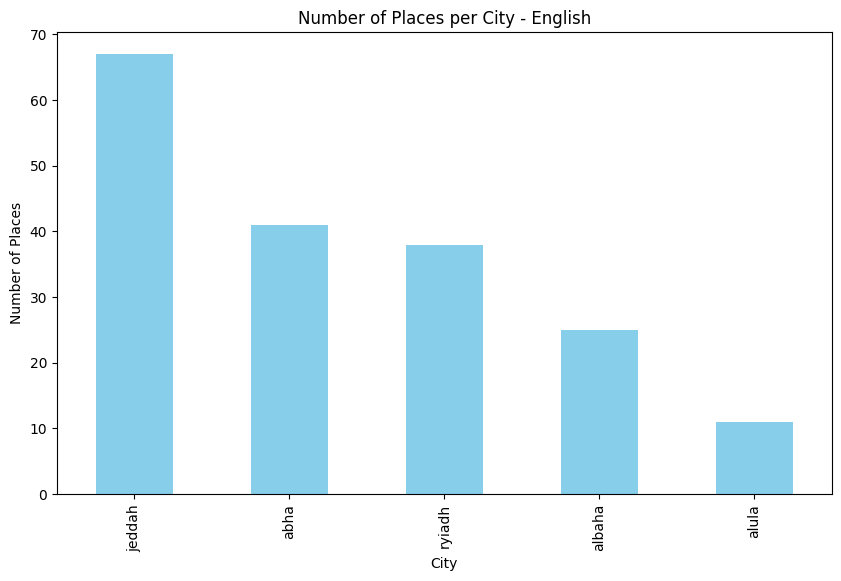

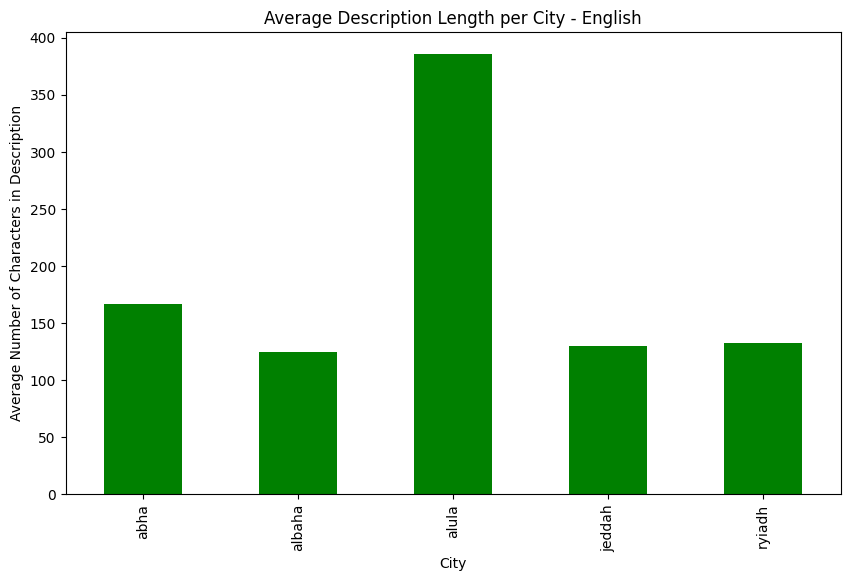

In [ ]:
# Number of places per city
city_counts = eng_df['DESTINATION'].value_counts()

plt.figure(figsize=(10,6))
city_counts.plot(kind='bar', color='skyblue')
plt.title("Number of Places per City - English")
plt.xlabel("City")
plt.ylabel("Number of Places")
plt.show()

# Description length per place
eng_df['DESCRIPTION_LENGTH'] = eng_df['DESCRIPTION'].apply(len)

# Average description length per city
plt.figure(figsize=(10,6))
eng_df.groupby('DESTINATION')['DESCRIPTION_LENGTH'].mean().plot(kind='bar', color='green')
plt.title("Average Description Length per City - English")
plt.xlabel("City")
plt.ylabel("Average Number of Characters in Description")
plt.show()

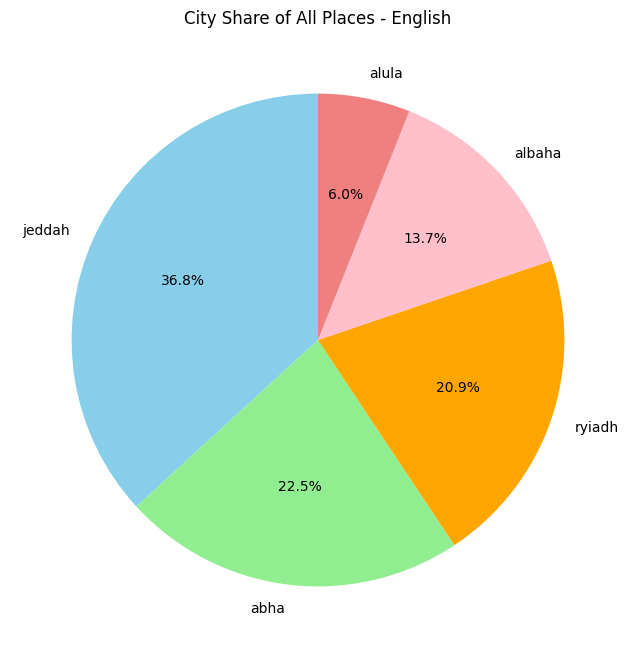

In [ ]:
plt.figure(figsize=(8, 8))

# Plot pie chart showing the share of each destination
eng_df['DESTINATION'].value_counts().plot(
    kind='pie',
    autopct='%1.1f%%',
    startangle=90,
    colors=['skyblue', 'lightgreen', 'orange', 'pink', 'lightcoral']
)

plt.title("City Share of All Places - English", fontsize=14, fontweight='bold')
plt.ylabel("")
plt.show()

In [ ]:
# Get the list of unique cities from the English dataset
cities = eng_df['DESTINATION'].unique()

# Iterate through each city
for city in cities:
    city_df = eng_df[eng_df['DESTINATION'] == city]

    sample_places = city_df['NAME'].head(5)

    # Print formatted output for better readability
    print(f"\nSample 5 places in {city.title()}:")
    for i, place in enumerate(sample_places, start=1):
        print(f"{i}. {place}")


Sample 5 places in Ryiadh:
1. riyadh national zoo
2. via riyadh
3. murabba palace
4. addoho neighborhood
5. wadi namar waterfall

Sample 5 places in Jeddah:
1. angawi house
2. jeddah circuit
3. beit thaker
4. bayt zenel
5. cyan water park

Sample 5 places in Alula:
1. alula old town village
2. dadan and jabal ikmah
3. hegra – alula
4. elephant rock
5. gharameel stargazing

Sample 5 places in Abha:
1. al a'aqaba view
2. al basta district
3. al dabab walkway
4. al ghayl valley
5. al muftaha art village

Sample 5 places in Albaha:
1. raghadan forest park
2. al malad castle
3. prince mohammed bin saud park
4. khairah forest park
5. prince sultan bin salman park


In [ ]:
# Iterate through each unique city
for city in cities:
    city_df = eng_df[eng_df['DESTINATION'] == city]
    print(f"\nSample places in {city.title()}:")
    display(city_df[['NAME', 'DESCRIPTION', 'LOCATION']].head(5))


Sample places in Ryiadh:


,NAME,DESCRIPTION,LOCATION
0,riyadh national zoo,"visit riyadh zoo, saudi arabia’s largest and o...",https://maps.app.goo.gl/34scfxjaaze3ydkq7
1,via riyadh,via riyadh offers luxury with the st. regis ho...,https://maps.app.goo.gl/f8wzscoeq82hsvrx7
2,murabba palace,al murabba historical palace in riyadh is a sy...,https://maps.app.goo.gl/pumfxdmyi7xlu8hf9
3,addoho neighborhood,addoho neighborhood is the last old neighborho...,https://maps.app.goo.gl/w127khwhzhngpydea
4,wadi namar waterfall,wadi namar waterfall and dam park in riyadh is...,https://maps.app.goo.gl/3gmocwfrwsrvepse7



Sample places in Jeddah:


,NAME,DESCRIPTION,LOCATION
38,angawi house,"the angawi house in jeddah, designed by dr. sa...",https://www.instagram.com/samiangawiarchitects/
39,jeddah circuit,a world-class motorsport venue hosting events ...,https://www.instagram.com/jeddahcircuit/?hl=en
40,beit thaker,"former home of the carpenter mohammed thaker, ...",https://www.visitalbalad.com/en/explore/1550
41,bayt zenel,"bayt zenel in al-balad, jeddah, is a historic ...",https://www.instagram.com/jeddahalbalad.sa?igs...
42,cyan water park,"experience sunny, family-friendly fun with wat...",https://www.instagram.com/cyanwaterpark?utm_so...



Sample places in Alula:


,NAME,DESCRIPTION,LOCATION
105,alula old town village,a crossroads of civilisations and oasis city o...,https://www.visitsaudi.com/en/alula/attraction...
106,dadan and jabal ikmah,embark on a historic journey in alula and unco...,https://www.visitsaudi.com/en/alula/attraction...
107,hegra – alula,once a thriving city on the ancient incense tr...,https://www.visitsaudi.com/en/alula/attraction...
108,elephant rock,"get up close to alula's beloved elephant rock,...",https://www.visitsaudi.com/en/alula/attraction...
109,gharameel stargazing,a night under the stars in a landscape like no...,https://www.visitsaudi.com/en/alula/attraction...



Sample places in Abha:


,NAME,DESCRIPTION,LOCATION
116,al a'aqaba view,where you can enjoy a stunning view of the cit...,https://www.traveldiv.com/tourism-in-abha/
117,al basta district,abha's historic heart. discover traditional ar...,https://discoveraseer.com/en/places/hy-albsth
118,al dabab walkway,walk among the clouds on abha's fog walkway. e...,https://discoveraseer.com/en/places/mmsha-aldabab
119,al ghayl valley,a serene oasis near abha. explore 25 ancient s...,https://discoveraseer.com/en/places/oady-alghyl
120,al muftaha art village,"explore almuftaha village in abha, known for i...",https://www.visitsaudi.com/en/aseer/attraction...



Sample places in Albaha:


,NAME,DESCRIPTION,LOCATION
157,raghadan forest park,"one of the most popular parks in al baha, ragh...",https://www.instagram.com/visitsaudi.ar/reel/c...
158,al malad castle,historical landmark in al baha giving you a gl...,https://www.youtube.com/watch?v=iaxsjfok1tm
159,prince mohammed bin saud park,"located within the area of raghdan forest, the...",https://baha.gov.sa/en/albums/imagedetails/183
160,khairah forest park,"a misty mountain escape with diverse flora, fa...",https://film.sa/locations-list-page/location-d...
161,prince sultan bin salman park,a stunning sarawat summit retreat for nature l...,https://www.youtube.com/watch?v=o7yvrtt0k0u


In [ ]:
print(ar_df.info())
print(ar_df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 184 entries, 0 to 183
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   DESTINATION         184 non-null    object
 1   NAME                184 non-null    object
 2   DESCRIPTION         184 non-null    object
 3   SM/REFERENCE LINKS  184 non-null    object
 4   LOCATION            184 non-null    object
dtypes: object(5)
memory usage: 7.3+ KB
None
DESTINATION           0
NAME                  0
DESCRIPTION           0
SM/REFERENCE LINKS    0
LOCATION              0
dtype: int64


#Projects

In [ ]:
# Read English projects file
eng_projects = pd.read_excel("/content/dataset/projects/english/projects_dataset_eng.xlsx")

# Rename columns to uppercase
eng_projects.columns = [col.upper() for col in eng_projects.columns]

# Check the result
print(eng_projects.head())

                                TITLE  \
0                             Qiddiya   
1                               ROSHN   
2                          Riyadh Art   
3                  Saudi Sports Track   
4  Mohammed bin Salman Nonprofit City   

                                             CONTENT  
0  Qiddiya is a large entertainment and sports de...  
1  ROSHN focuses on building modern residential c...  
2  Riyadh Art promotes creativity and culture in ...  
3  The Saudi Sports Track is designed for sports ...  
4  This city is a nonprofit initiative to support...  


In [ ]:
# Read Arabic projects file
ar_projects = pd.read_excel("/content/dataset/projects/arabic/projects_dataset_ara.xlsx")

# Rename columns to uppercase
ar_projects.columns = [col.upper() for col in ar_projects.columns]

# Check the result
print(ar_projects.head())

                             TITLE  \
0                           القدية   
1                             روشن   
2                       الرياض آرت   
3                   المسار الرياضي   
4  مدينة محمد بن سلمان غير الربحية   

                                             CONTENT  
0  القدية هي وجهة ضخمة للترفيه والرياضة. توفر حدا...  
1  تركز روشن على بناء مجتمعات سكنية حديثة في السع...  
2  يهدف برنامج الرياض آرت لتعزيز الإبداع والثقافة...  
3  المسار الرياضي مصمم للأنشطة الرياضية واللياقة ...  
4  المدينة مبادرة غير ربحية لدعم التعليم والرعاية...  


In [ ]:
eng_projects.fillna("NA", inplace=True)  # Fill missing values
text_columns = ['TITLE', 'CONTENT']
for col in text_columns:
    eng_projects[col] = eng_projects[col].astype(str).str.strip().str.lower()  # lowercase for processing

In [ ]:
ar_projects.fillna("غير متوفر", inplace=True)  # Fill missing values
text_columns_ar = ['TITLE', 'CONTENT']
for col in text_columns_ar:
    ar_projects[col] = ar_projects[col].astype(str).str.strip().str.lower()  # lowercase for processing

In [ ]:
# Check first few rows
print(eng_projects.head())
print(ar_projects.head())

                                TITLE  \
0                             qiddiya   
1                               roshn   
2                          riyadh art   
3                  saudi sports track   
4  mohammed bin salman nonprofit city   

                                             CONTENT  
0  qiddiya is a large entertainment and sports de...  
1  roshn focuses on building modern residential c...  
2  riyadh art promotes creativity and culture in ...  
3  the saudi sports track is designed for sports ...  
4  this city is a nonprofit initiative to support...  
                             TITLE  \
0                           القدية   
1                             روشن   
2                       الرياض آرت   
3                   المسار الرياضي   
4  مدينة محمد بن سلمان غير الربحية   

                                             CONTENT  
0  القدية هي وجهة ضخمة للترفيه والرياضة. توفر حدا...  
1  تركز روشن على بناء مجتمعات سكنية حديثة في السع...  
2  يهدف برنامج الرياض آرت لتع

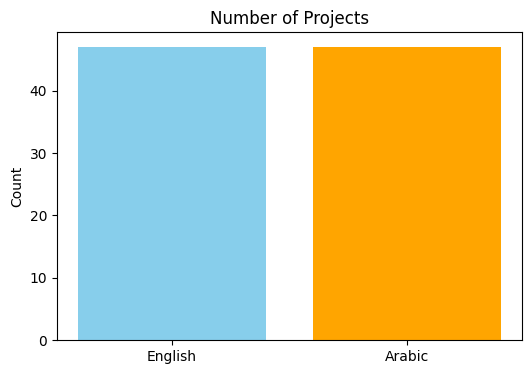

In [ ]:
# Number of projects
plt.figure(figsize=(6,4))
plt.bar(["English", "Arabic"], [len(eng_projects), len(ar_projects)], color=['skyblue','orange'])
plt.title("Number of Projects")
plt.ylabel("Count")
plt.show()

In [ ]:
# Save the cleaned English projects dataset
eng_projects.to_excel(
    "/content/dataset/projects/english/saudi_projects_english_cleaned.xlsx",
    index=False
)

# Save the cleaned Arabic projects dataset
ar_projects.to_excel(
    "/content/dataset/projects/arabic/saudi_projects_arabic_cleaned.xlsx",
    index=False
)

# Confirmation message
print("Cleaned project files saved successfully!")

Cleaned project files saved successfully!


In [ ]:
# Check for missing values in the cleaned English projects dataset

print("Missing values in English Projects:")
print(eng_projects.isnull().sum())

Missing values in English Projects:
TITLE             0
CONTENT           0
CONTENT_LENGTH    0
dtype: int64


In [ ]:
# Check if the column exists, then drop it
if 'CONTENT_LENGTH' in eng_projects.columns:
    eng_projects.drop(columns=['CONTENT_LENGTH'], inplace=True)

# Preview the dataset after dropping the column
print("English projects dataset after dropping 'CONTENT_LENGTH':")
print(eng_projects.head())

                                TITLE  \
0                             qiddiya   
1                               roshn   
2                          riyadh art   
3                  saudi sports track   
4  mohammed bin salman nonprofit city   

                                             CONTENT  
0  qiddiya is a large entertainment and sports de...  
1  roshn focuses on building modern residential c...  
2  riyadh art promotes creativity and culture in ...  
3  the saudi sports track is designed for sports ...  
4  this city is a nonprofit initiative to support...  


In [ ]:
# Check for missing values in the cleaned Arabic projects dataset

print("\nMissing values in Arabic Projects:")
print(ar_projects.isnull().sum())


Missing values in Arabic Projects:
TITLE      0
CONTENT    0
dtype: int64


In [ ]:
# Save the cleaned English projects dataset to Excel

output_path_eng = "/content/dataset/projects/english/saudi_projects_english_cleaned.xlsx"
eng_projects.to_excel(output_path_eng, index=False)

#Food

In [ ]:
# English dishes file
eng_dishes = pd.read_excel("/content/dataset/food/english/food in english.xlsx")

# Arabic dishes file
ar_dishes = pd.read_excel("/content/dataset/food/arabic/food in ar.xlsx")

# Check first few rows
print(eng_dishes.head())
print(ar_dishes.head())

      title                   destination  \
0  Mafthah   Northern and Central Regions   
1     Kabsa  Northern and Central Regions   
2  Matazeez  Northern and Central Regions   
3    Mansaf  Northern and Central Regions   
4   Jareesh  Northern and Central Regions   

                                             content  
0   A whole cooked lamb served without cutting; a...  
1  The most famous Saudi dish, made with rice and...  
2  Small baked dough pieces soaked in broth, ofte...  
3  Pieces of lamb cooked in yogurt sauce with her...  
4  Crushed wheat cooked in water, sometimes with ...  
     الأكلة                   المنطقة  \
0    المفطح  المناطق الشمالية والوسطى   
1    الكبسة  المناطق الشمالية والوسطى   
2  المطازيز  المناطق الشمالية والوسطى   
3    المنسف  المناطق الشمالية والوسطى   
4    الجريش  المناطق الشمالية والوسطى   

                                               الوصف  
0  عبارة عن خروف مطبوخ بالكامل دون أن يقسم إلى أج...  
1  وهي أشهر المأكولات السعودية وتكون غالبا

In [ ]:
# Convert column names to uppercase
eng_dishes.columns = [col.upper() for col in eng_dishes.columns]
ar_dishes.columns = [col.upper() for col in ar_dishes.columns]

# Check result
print("English Dishes Columns:", eng_dishes.columns.tolist())
print("Arabic Dishes Columns:", ar_dishes.columns.tolist())

English Dishes Columns: ['TITLE', 'DESTINATION', 'CONTENT']
Arabic Dishes Columns: ['الأكلة', 'المنطقة', 'الوصف']


In [ ]:
eng_dishes.fillna("NA", inplace=True)
text_columns = ['TITLE', 'DESTINATION', 'CONTENT']
for col in text_columns:
    eng_dishes[col] = eng_dishes[col].astype(str).str.strip().str.lower()

In [ ]:
# Rename Arabic columns to English
ar_dishes.rename(columns={
    'الأكلة': 'TITLE',
    'المنطقة': 'DESTINATION',
    'الوصف': 'CONTENT'
}, inplace=True)

# Check result
print("Arabic Dishes Columns (Renamed):", ar_dishes.columns.tolist())

Arabic Dishes Columns (Renamed): ['TITLE', 'DESTINATION', 'CONTENT']


In [ ]:
ar_dishes.fillna("غير متوفر", inplace=True)
text_columns_ar = ['TITLE', 'DESTINATION', 'CONTENT']
for col in text_columns_ar:
    ar_dishes[col] = ar_dishes[col].astype(str).str.strip().str.lower()

In [ ]:
print(eng_dishes.head())
print(ar_dishes.head())

      TITLE                   DESTINATION  \
0   mafthah  northern and central regions   
1     kabsa  northern and central regions   
2  matazeez  northern and central regions   
3    mansaf  northern and central regions   
4   jareesh  northern and central regions   

                                             CONTENT  
0  a whole cooked lamb served without cutting; a ...  
1  the most famous saudi dish, made with rice and...  
2  small baked dough pieces soaked in broth, ofte...  
3  pieces of lamb cooked in yogurt sauce with her...  
4  crushed wheat cooked in water, sometimes with ...  
      TITLE               DESTINATION  \
0    المفطح  المناطق الشمالية والوسطى   
1    الكبسة  المناطق الشمالية والوسطى   
2  المطازيز  المناطق الشمالية والوسطى   
3    المنسف  المناطق الشمالية والوسطى   
4    الجريش  المناطق الشمالية والوسطى   

                                             CONTENT  
0  عبارة عن خروف مطبوخ بالكامل دون أن يقسم إلى أج...  
1  وهي أشهر المأكولات السعودية وتكون غالبا

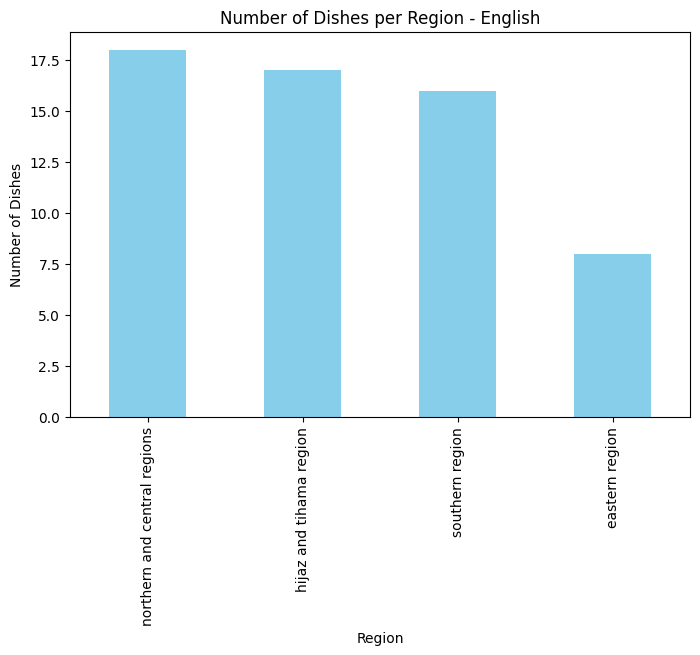

In [ ]:
# Number of dishes per region - English
plt.figure(figsize=(8,5))
eng_dishes['DESTINATION'].value_counts().plot(kind='bar', color='skyblue')
plt.title("Number of Dishes per Region - English")
plt.xlabel("Region")
plt.ylabel("Number of Dishes")
plt.show()

In [ ]:
eng_dishes.to_excel("/content/dataset/food/english/saudi_dishes_english_cleaned.xlsx", index=False)
ar_dishes.to_excel("/content/dataset/food/arabic/saudi_dishes_arabic_cleaned.xlsx", index=False)

print("Cleaned dishes files saved successfully!")

Cleaned dishes files saved successfully!


#Clothes

In [ ]:
# Read English traditional clothing file
eng_clothes = pd.read_excel("/content/dataset/clothes/english/historical outfits in eng.xlsx")

# Read Arabic traditional clothing file
ar_clothes = pd.read_excel("/content/dataset/clothes/arabic/historical outfits in ar.xlsx")

# Check first few rows
print("English Clothes:")
print(eng_clothes.head())
print("\nArabic Clothes:")
print(ar_clothes.head())

English Clothes:
            titile                                            content
0   Central Region  :\n\nAl-Makhnaq: A sheer silk or chiffon fabri...
1   Eastern Region  Outside the Home:\n\nAl-Milfa‘: A rectangular ...
2   Western Region  Women in the western region wore colorful, ela...
3  Southern Region  Women’s clothing was made from locally availab...
4  Northern Region  Women’s clothing in the north featured a varie...

Arabic Clothes:
            العنوان                                            المحتوى
0    المنطقة الوسطى  خارج المنزل:المخنق: قماش حريري أو شيفون يُخاط ...
1   المنطقة الشرقية  خارج المنزل:الملفّع: غطاء مستطيل أسود من القطن...
2   المنطقة الغربية  ارتدت النساء في المنطقة الغربية ملابس ملونة وم...
3  المنطقة الجنوبية  كانت ملابس النساء مصنوعة من مواد متوفرة محلياً...
4  المنطقة الشمالية  كانت ملابس النساء في الشمال متنوعة بالألوان وا...


In [ ]:
# For Arabic file: rename columns to English
ar_clothes.rename(columns={
    'العنوان': 'TITLE',
    'المحتوى': 'CONTENT'
}, inplace=True)

# Convert column names to uppercase (optional, for consistency)
eng_clothes.columns = [col.upper() for col in eng_clothes.columns]
ar_clothes.columns = [col.upper() for col in ar_clothes.columns]

print("English Clothes Columns:", eng_clothes.columns.tolist())
print("Arabic Clothes Columns:", ar_clothes.columns.tolist())

English Clothes Columns: ['TITILE', 'CONTENT']
Arabic Clothes Columns: ['TITLE', 'CONTENT']


In [ ]:
# Correct typo in English clothes file
eng_clothes.rename(columns={'TITILE': 'TITLE'}, inplace=True)

# Check result
print("Corrected English Clothes Columns:", eng_clothes.columns.tolist())

Corrected English Clothes Columns: ['TITLE', 'CONTENT']


In [ ]:
eng_clothes.fillna("NA", inplace=True)  # Fill missing values
text_columns = ['TITLE', 'CONTENT']
for col in text_columns:
    eng_clothes[col] = eng_clothes[col].astype(str).str.strip().str.lower()  # lowercase for processing

In [ ]:
ar_clothes.fillna("غير متوفر", inplace=True)  # Fill missing values
text_columns_ar = ['TITLE', 'CONTENT']
for col in text_columns_ar:
    ar_clothes[col] = ar_clothes[col].astype(str).str.strip()

In [ ]:
eng_clothes.to_excel("/content/dataset/clothes/english/saudi_traditional_clothes_english_cleaned.xlsx", index=False)
ar_clothes.to_excel("/content/dataset/clothes/arabic/saudi_traditional_clothes_arabic_cleaned.xlsx", index=False)

print("Cleaned traditional clothes files saved successfully!")

Cleaned traditional clothes files saved successfully!


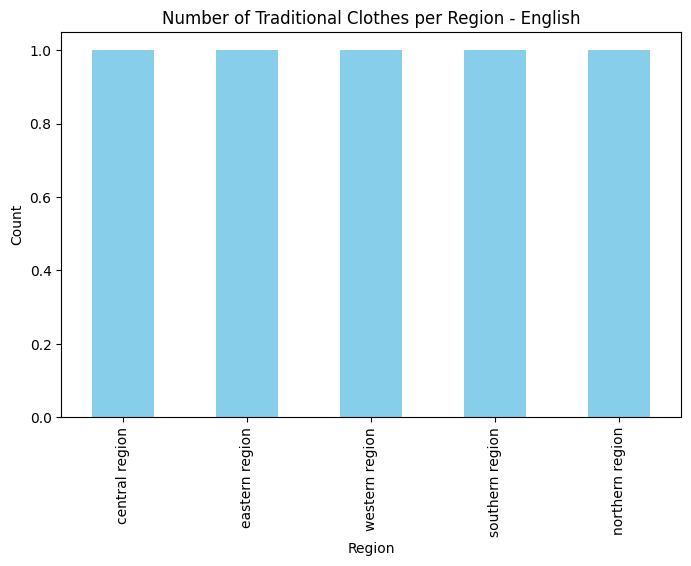

In [ ]:
# Number of traditional clothes per region
plt.figure(figsize=(8,5))
eng_clothes['TITLE'].value_counts().plot(kind='bar', color='skyblue')
plt.title("Number of Traditional Clothes per Region - English")
plt.xlabel("Region")
plt.ylabel("Count")
plt.show()

# Characters

In [ ]:
# Load Arabic Important Figures Excel file
ar_figures = pd.read_excel("/content/dataset/characters/arabic/characters_arabic.xlsx")

# Show columns
print("Arabic Important Figures Columns:", ar_figures.columns.tolist())

# Show first few rows to check structure
ar_figures.head()

Arabic Important Figures Columns: ['TITLE', 'CONTENT']


,TITLE,CONTENT
0,الملك عبدالعزيز بن عبدالرحمن آل سعود.,الملك عبدالعزيز بن عبدالرحمن آل سعود (1293هـ/1...
1,الملك سعود بن عبدالعزيز آل سعود.,الملك سعود بن عبدالعزيز آل سعود (1902–1969م) ث...
2,الملك فيصل بن عبدالعزيز آل سعود.,الملك فيصل بن عبدالعزيز آل سعود (1906–1975م) ه...
3,الملك خالد بن عبدالعزيز آل سعود.,الملك خالد بن عبدالعزيز آل سعود وُلد عام 1913م...
4,الملك فهد بن عبدالعزيز آل سعود.,الملك فهد بن عبدالعزيز آل سعود (1921–2005) خام...


In [ ]:
# Load English Important Figures Excel file
eng_figures = pd.read_excel("/content/dataset/characters/english/characters_english.xlsx")

# Show columns
print("English Important Figures Columns:", eng_figures.columns.tolist())

# Show first few rows to check structure
eng_figures.head()

English Important Figures Columns: ['TITLE', 'CONTENT']


,TITLE,CONTENT
0,King Abdulaziz bin Abdulrahman Al Saud,King Abdulaziz bin Abdulrahman Al Saud (1877–1...
1,King Saud bin Abdulaziz Al Saud,King Saud bin Abdulaziz Al Saud (1902–1969) wa...
2,King Faisal bin Abdulaziz Al Saud,King Faisal bin Abdulaziz Al Saud (1906–1975) ...
3,King Khalid bin Abdulaziz Al Saud,King Khalid bin Abdulaziz Al Saud (1913–1982) ...
4,King Fahd bin Abdulaziz Al Saud,"King Fahd bin Abdulaziz Al Saud (1921–2005), t..."


In [ ]:
# Check for missing values in both Arabic and English Important Figures files
print("Missing values in Arabic Important Figures:")
print(ar_figures.isnull().sum())

print("\nMissing values in English Important Figures:")
print(eng_figures.isnull().sum())

Missing values in Arabic Important Figures:
TITLE      0
CONTENT    0
dtype: int64

Missing values in English Important Figures:
TITLE      0
CONTENT    0
dtype: int64


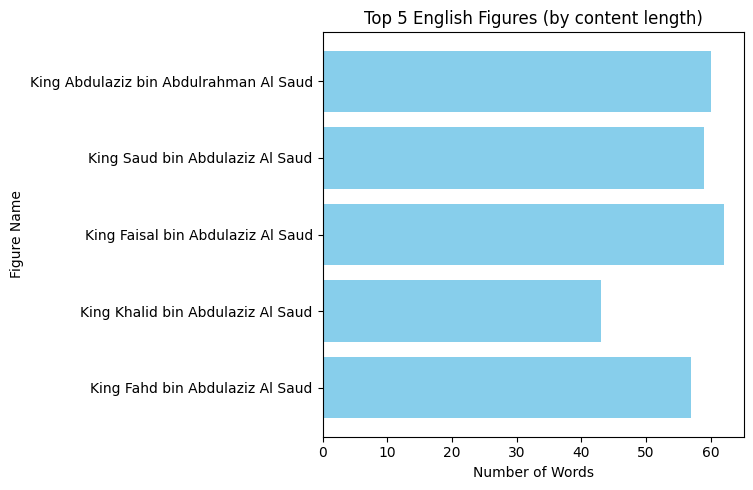

In [ ]:
# Add a new column for content length
ar_figures["CONTENT_LENGTH"] = ar_figures["CONTENT"].apply(lambda x: len(str(x).split()))
eng_figures["CONTENT_LENGTH"] = eng_figures["CONTENT"].apply(lambda x: len(str(x).split()))

# Display first 5 figures as example
top5_ar = ar_figures.head(5)
top5_en = eng_figures.head(5)

plt.figure(figsize=(12,5))

# English
plt.subplot(1,2,2)
plt.barh(top5_en["TITLE"], top5_en["CONTENT_LENGTH"], color='skyblue')
plt.title("Top 5 English Figures (by content length)")
plt.xlabel("Number of Words")
plt.ylabel("Figure Name")
plt.gca().invert_yaxis()

plt.tight_layout()
plt.show()

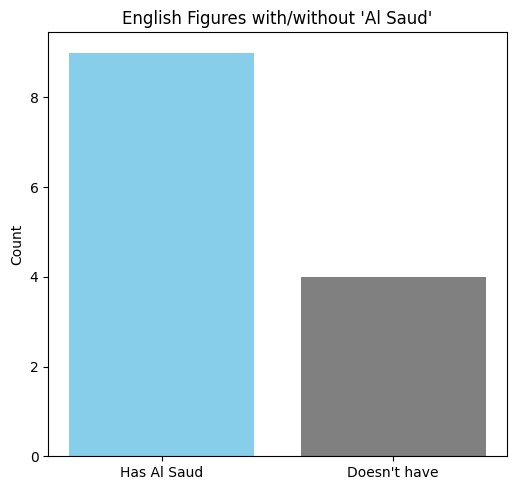

In [ ]:
# English: check if "Al Saud" appears in the title
eng_figures["HAS_AL_SAUD"] = eng_figures["TITLE"].apply(lambda x: "al saud" in str(x).lower())

# Count occurrences
eng_counts = eng_figures["HAS_AL_SAUD"].value_counts()

# Visualization
plt.figure(figsize=(10,5))
plt.subplot(1,2,2)
plt.bar(["Has Al Saud", "Doesn't have"], [eng_counts.get(True,0), eng_counts.get(False,0)], color=['skyblue','gray'])
plt.title("English Figures with/without 'Al Saud'")
plt.ylabel("Count")

plt.tight_layout()
plt.show()

In [ ]:
# Clean whitespace from both Arabic and English Important Figures files

# Define a helper function
def strip_text(df):
    for col in df.columns:
        if df[col].dtype == "object":  # Apply only to text columns
            df[col] = df[col].astype(str).str.strip()
    return df

# Apply on both datasets
ar_figures = strip_text(ar_figures)
eng_figures = strip_text(eng_figures)

# Verify the cleaning worked
print("Whitespace stripped successfully from Important Figures datasets!")
print("\nArabic sample after strip:\n", ar_figures.head(3))
print("\nEnglish sample after strip:\n", eng_figures.head(3))

Whitespace stripped successfully from Important Figures datasets!

Arabic sample after strip:
                                    TITLE  \
0  الملك عبدالعزيز بن عبدالرحمن آل سعود.   
1       الملك سعود بن عبدالعزيز آل سعود.   
2       الملك فيصل بن عبدالعزيز آل سعود.   

                                             CONTENT  CONTENT_LENGTH  
0  الملك عبدالعزيز بن عبدالرحمن آل سعود (1293هـ/1...              75  
1  الملك سعود بن عبدالعزيز آل سعود (1902–1969م) ث...              52  
2  الملك فيصل بن عبدالعزيز آل سعود (1906–1975م) ه...              77  

English sample after strip:
                                     TITLE  \
0  King Abdulaziz bin Abdulrahman Al Saud   
1         King Saud bin Abdulaziz Al Saud   
2       King Faisal bin Abdulaziz Al Saud   

                                             CONTENT  CONTENT_LENGTH  \
0  King Abdulaziz bin Abdulrahman Al Saud (1877–1...              60   
1  King Saud bin Abdulaziz Al Saud (1902–1969) wa...              59   
2  King Faisal bi

In [ ]:
# Check columns of English Important Figures file
print("English Important Figures Columns:", eng_figures.columns.tolist())

English Important Figures Columns: ['TITLE', 'CONTENT', 'CONTENT_LENGTH', 'HAS_AL_SAUD']


In [ ]:
# Drop the HAS_AL_SAUD column from English Important Figures
if 'HAS_AL_SAUD' in eng_figures.columns:
    eng_figures.drop(columns=['HAS_AL_SAUD'], inplace=True)

# Check result
print("Columns after dropping HAS_AL_SAUD:", eng_figures.columns.tolist())

Columns after dropping HAS_AL_SAUD: ['TITLE', 'CONTENT', 'CONTENT_LENGTH']


In [ ]:
if 'CONTENT_LENGTH' in eng_figures.columns:
    eng_figures.drop(columns=['CONTENT_LENGTH'], inplace=True)

# Check result
print("Columns after dropping CONTENT_LENGTH:", eng_figures.columns.tolist())

Columns after dropping CONTENT_LENGTH: ['TITLE', 'CONTENT']


In [ ]:
# Save Arabic and English Important Figures in the same style
eng_figures.to_excel("/content/dataset/characters/english/characters_english_cleaned.xlsx", index=False)
ar_figures.to_excel("/content/dataset/characters/arabic/characters_arabic_cleaned.xlsx", index=False)

print("Cleaned Important Figures files saved successfully!")

Cleaned Important Figures files saved successfully!


#Saudi

In [ ]:
# Load English Saudi Symbols file
eng_symbols = pd.read_excel("/content/dataset/saudi/arabic/saudi_arabic.xlsx")

# Load Arabic Saudi Symbols file
ar_symbols = pd.read_excel("/content/dataset/saudi/english/saudi_english.xlsx")

# Check columns
print("English Saudi Symbols Columns:", eng_symbols.columns.tolist())
print("Arabic Saudi Symbols Columns:", ar_symbols.columns.tolist())

# Show first few rows
print("\nEnglish sample:\n", eng_symbols.head())
print("\nArabic sample:\n", ar_symbols.head())


English Saudi Symbols Columns: ['TITLE', 'CONTENT']
Arabic Saudi Symbols Columns: ['TITLE', 'CONTENT']

English sample:
                                      TITLE  \
0                   الدولة السعودية الأولى   
1                  الدولة السعودية الثانية   
2  الدولة السعودية الثالثة / تأسيس المملكة   
3                            العلم السعودي   
4                             شعار المملكة   

                                             CONTENT  
0  تأسست الدولة السعودية الأولى عام 1157هـ / 1744...  
1  تأسست الدولة السعودية الثانية عام 1240هـ / 182...  
2  بدأت الدولة السعودية الثالثة عام 1902م باستردا...  
3  يتكوّن العلم السعودي من اللون الأخضر الذي يرمز...  
4  يتكون شعار المملكة من سيفين متقاطعين يرمزان إل...  

Arabic sample:
                                             TITLE  \
0                           The First Saudi State   
1                          The Second Saudi State   
2  The Third Saudi State / The Kingdom’s Founding   
3                                  The Saud

In [ ]:
# Clean English Saudi Symbols
eng_symbols.fillna("NA", inplace=True)
eng_symbols["TITLE"] = eng_symbols["TITLE"].astype(str).str.strip().str.lower()
eng_symbols["CONTENT"] = eng_symbols["CONTENT"].astype(str).str.strip().str.lower()

# Clean Arabic Saudi Symbols
ar_symbols.fillna("غير متوفر", inplace=True)
ar_symbols["TITLE"] = ar_symbols["TITLE"].astype(str).str.strip()
ar_symbols["CONTENT"] = ar_symbols["CONTENT"].astype(str).str.strip()

# Verify first few rows
print("English Saudi Symbols after cleaning:\n", eng_symbols.head())
print("\nArabic Saudi Symbols after cleaning:\n", ar_symbols.head())

English Saudi Symbols after cleaning:
                                      TITLE  \
0                   الدولة السعودية الأولى   
1                  الدولة السعودية الثانية   
2  الدولة السعودية الثالثة / تأسيس المملكة   
3                            العلم السعودي   
4                             شعار المملكة   

                                             CONTENT  
0  تأسست الدولة السعودية الأولى عام 1157هـ / 1744...  
1  تأسست الدولة السعودية الثانية عام 1240هـ / 182...  
2  بدأت الدولة السعودية الثالثة عام 1902م باستردا...  
3  يتكوّن العلم السعودي من اللون الأخضر الذي يرمز...  
4  يتكون شعار المملكة من سيفين متقاطعين يرمزان إل...  

Arabic Saudi Symbols after cleaning:
                                             TITLE  \
0                           The First Saudi State   
1                          The Second Saudi State   
2  The Third Saudi State / The Kingdom’s Founding   
3                                  The Saudi Flag   
4                            The Kingdom’s Emblem 

In [ ]:
# Strip whitespace from text columns
eng_symbols["TITLE"] = eng_symbols["TITLE"].astype(str).str.strip()
eng_symbols["CONTENT"] = eng_symbols["CONTENT"].astype(str).str.strip()

ar_symbols["TITLE"] = ar_symbols["TITLE"].astype(str).str.strip()
ar_symbols["CONTENT"] = ar_symbols["CONTENT"].astype(str).str.strip()

# Verify
print("English Saudi Symbols sample after strip:\n", eng_symbols.head())
print("\nArabic Saudi Symbols sample after strip:\n", ar_symbols.head())

English Saudi Symbols sample after strip:
                                      TITLE  \
0                   الدولة السعودية الأولى   
1                  الدولة السعودية الثانية   
2  الدولة السعودية الثالثة / تأسيس المملكة   
3                            العلم السعودي   
4                             شعار المملكة   

                                             CONTENT  
0  تأسست الدولة السعودية الأولى عام 1157هـ / 1744...  
1  تأسست الدولة السعودية الثانية عام 1240هـ / 182...  
2  بدأت الدولة السعودية الثالثة عام 1902م باستردا...  
3  يتكوّن العلم السعودي من اللون الأخضر الذي يرمز...  
4  يتكون شعار المملكة من سيفين متقاطعين يرمزان إل...  

Arabic Saudi Symbols sample after strip:
                                             TITLE  \
0                           The First Saudi State   
1                          The Second Saudi State   
2  The Third Saudi State / The Kingdom’s Founding   
3                                  The Saudi Flag   
4                            The Kingdom’s

In [ ]:
# Save cleaned Saudi Symbols files
eng_symbols.to_excel("/content/dataset/saudi/english/saudi_symbols_english_cleaned.xlsx", index=False)
ar_symbols.to_excel("/content/dataset/saudi/arabic/saudi_symbols_arabic_cleaned.xlsx", index=False)

print(" Cleaned Saudi Symbols files saved successfully!")

 Cleaned Saudi Symbols files saved successfully!
